# Capstone Project - Dataset Augmentation

Approximately 3800 images were successfully extracted from the HTS Image dataset. In order to properly train and use convolutional models, we will have to augment the image dataset by performing transformations such as rotations and flipping. Since well indexing (alignment) is important, we will not be using skewing or scaling of the images.

In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

import os

import random

from utils import *

In [2]:
if not os.path.exists('data/augmentation/rotated'):
    os.makedirs('data/augmentation/rotated')
    
if not os.path.exists('data/augmentation/flipped'):
    os.makedirs('data/augmentation/flipped')

In [3]:
ext_path = os.path.join('data', 'extracted')
save_path = os.path.join('data', 'augmentation')
random.seed(42)

In [4]:
def rotate_image(image, angle):
    image_center = tuple(np.array(image.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
    result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
    return result

In [5]:
# TEST
test_img = cv2.imread(os.path.join(ext_path, 'Run11_0Hr_XY03_00001_CH4.png'))

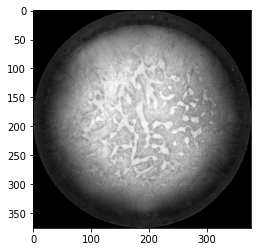

In [6]:
plt.imshow(test_img)

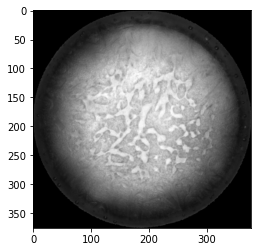

In [7]:
plt.imshow(rotate_image(test_img, random.randrange(0, 360)))

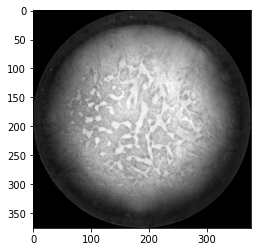

In [8]:
plt.imshow(cv2.flip(test_img, 1))

## Process Images

In [9]:
for file in os.listdir(ext_path):
    img = cv2.imread(os.path.join(ext_path, file))
    rot = rotate_image(img, random.randrange(0, 360))
    flipped = cv2.flip(img, random.randint(0, 1))
    plt.imsave(os.path.join(save_path, 'rotated', file), rot)
    plt.imsave(os.path.join(save_path, 'flipped', file), flipped)

In [10]:
len(os.listdir(ext_path))

4174